# Predicting the price of Bulldozers using machine learning
This project deals with predicting the price of bulldozers based on the description of different parts of the bulldozers

## 1. Problem definition
> Can the price of a future bulldozer be predicted given attributes of it's different parts

## 2. Data
> The data used in this project was gotten from the kaggle website... https://www.kaggle.com/c/bluebook-for-bulldozers

There are 3 main data files in the dataset:
>* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
The attributes of the bulldozer is as follows

  **Variable  :	Description**
>   - SalesID : unique identifier of a particular sale of a machine at auction 
  - MachineID : identifier for a particular machine
  - ModelID : identifier for a unique machine model (i.e. fiModelDesc)
  - datasource	: source of the sale record; some sources are more diligent about reporting attributes of the machine than others.
  - auctioneerID	: identifier of a particular auctioneer.
  - YearMade	 :year of manufacturer of the Machine
  - MachineHoursCurrentMeter	: current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
  - UsageBand	: value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
  - Saledate	 :time of sale
  - Saleprice	: cost of sale in USD
  - fiModelDesc	: Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
  - fiBaseModel	: disaggregation of fiModelDesc
  - fiSecondaryDesc:  disaggregation of fiModelDesc
  - fiModelSeries	: disaggregation of fiModelDesc
  - fiModelDescriptor:  disaggregation of fiModelDesc
  - ProductSize	: Don't know what this is 
  - ProductClassDesc	 :description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
  - State	: US State in which sale occurred
  - ProductGroup	 :identifier for top-level hierarchical grouping of fiModelDesc
  - ProductGroupDesc	  description of top-level hierarchical grouping of fiModelDesc
  - Drive_System	machine configuration;  typcially describes whether 2 or 4 wheel drive
  - Enclosure	machine configuration : does machine have an enclosed cab or not
  - Forks	machine configuration : attachment used for lifting
  - Pad_Type	machine configuration : type of treads a crawler machine uses
  - Ride_Control	machine configuration : optional feature on loaders to make the ride smoother
  - Stick : machine configuration - type of control 
  - Transmission	machine configuration : describes type of transmission;  typically automatic or manual
  - Turbocharged	machine configuration : engine naturally aspirated or turbocharged
  - Blade_Extension : machine configuration - extension of standard blade
  - Blade_Width : machine configuration - width of blade
  - Enclosure_Type : machine configuration - does machine have an enclosed cab or not
  - Engine_Horsepower : machine configuration - engine horsepower rating
  - Hydraulics :	machine configuration - type of hydraulics
  - Pushblock :	machine configuration - option
  - Ripper :	machine configuration - implement attached to machine to till soil
  - Scarifier :	machine configuration - implement attached to machine to condition soil
  - Tip_control : machine configuration - type of blade control
  - Tire_Size : machine configuration - size of primary tires
  - Coupler : machine configuration - type of implement interface
  - Coupler_System : machine configuration - type of implement interface
  - Grouser_Tracks : machine configuration - describes ground contact interface
  - Hydraulics_Flow : machine configuration - normal or high flow hydraulic system
  - Track_Type : machine configuration - type of treads a crawler machine uses
  - Undercarriage_Pad_Width : machine configuration - width of crawler treads
  - Stick_Length	machine configuration  :  length of machine digging implement
  - Thumb : machine configuration - attachment used for grabbing
  - Pattern_Changer : machine configuration - can adjust the operator control configuration to suit the user
  - Grouser_Type	machine configuration : type of treads a crawler machine uses
  - Backhoe_Mounting	machine configuration : optional interface used to add a backhoe attachment
  - Blade_Type : machine configuration - describes type of blade
  - Travel_Controls : machine configuration - describes operator control configuration
  - Differential_Type : machine configuration - differential type, typically locking or standard
  - Steering_Controls : machine configuration - describes operator control configuration


### Importing tools

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

plt.style.use('seaborn')

### Load the datasets (train and validation sets)

In [3]:
file = '../../datafiles/bulldozers/TrainAndValid.csv'

####  If a dataset has a time series stamp, parse the date/time feature using pandas for easier handling e.g.
`name = pandas.read_csv(file_name, parse_dates=[list of time stamp objects]`

In [4]:
df = pd.read_csv(file, low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
# finding empty value
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
# description 
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


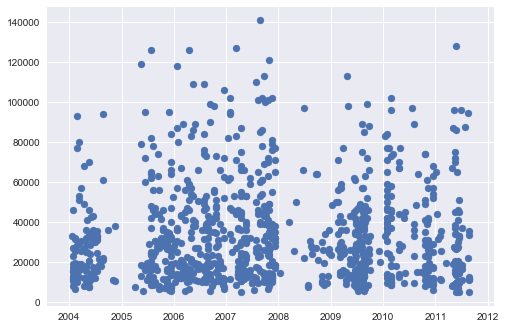

In [8]:
# scatter plot of saledate and saleprice
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
plt.show()

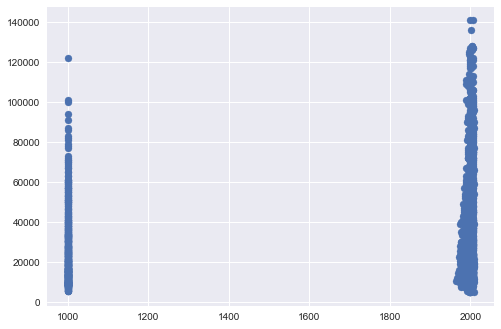

In [9]:
# saleprice and yearmade
plt.scatter(df['YearMade'][:3000], df.SalePrice[:3000])
plt.show()

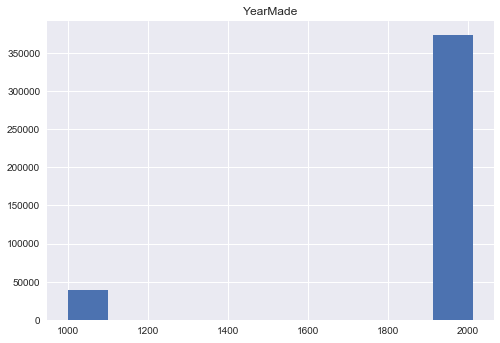

In [10]:
# histogram of the year each bulldozers were made
df.hist('YearMade')
plt.show()

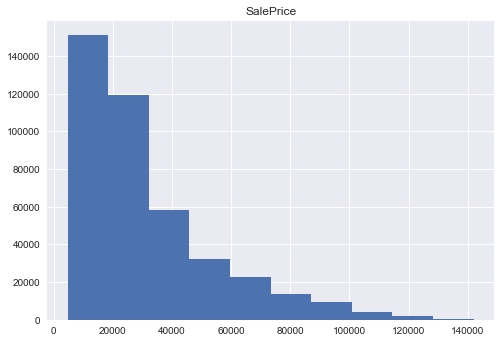

In [11]:
# distribution of the sale Price
df.hist('SalePrice')
plt.show()

In [12]:
# sort the dataset by saledate
df.sort_values('saledate', inplace=True, ascending=True)
df['saledate'][:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

#### making a copy of df

In [13]:
df_tmp = df.copy()

In [14]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


###  Add datetime parameter for `saledate` column

In [15]:
# creating more features from the saledate feature
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek' ] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [16]:
# Removing the saledate column 
df_tmp.drop('saledate', axis=1, inplace=True)

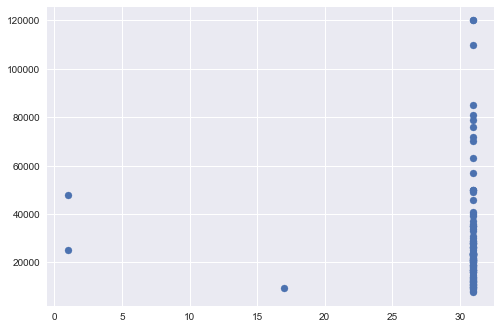

In [17]:
# sales price and the sales month graph, plotting the first 100 values
plt.scatter(df_tmp['saleDay'][:100] , df_tmp['SalePrice'][:100])
plt.show()

In [18]:
# comparing the productsize and its sales price
pd.crosstab(df_tmp['ProductSize'], df_tmp['SalePrice'])

SalePrice,7500.0,7550.0,7600.0,7650.0,7700.0,7750.0,7800.0,7850.0,7900.0,8000.0,...,123000.0,123375.0,123500.0,124000.0,124500.0,125000.0,126000.0,126500.0,127000.0,127500.0
ProductSize,,,,,,,,,,,,,,,,,,,,,
Compact,0,0,0,0,0,0,0,0,0,132,...,0,0,0,0,0,0,0,0,0,0
Large,0,0,0,0,0,0,0,0,0,117,...,8,1,1,6,0,131,8,2,8,20
Large / Medium,75,0,3,0,1,12,0,0,1,155,...,0,0,0,0,0,0,0,0,0,0
Medium,0,0,0,0,0,0,0,0,0,127,...,2,0,3,6,3,105,8,0,8,31
Mini,423,2,23,2,15,195,14,4,10,940,...,0,0,0,0,0,0,0,0,0,0
Small,59,0,1,0,2,12,0,0,1,140,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

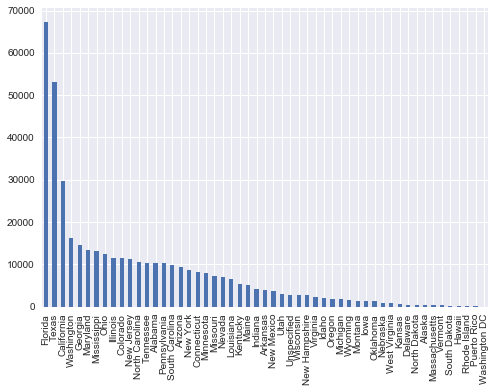

In [20]:
# looking at the sales price by state
df_tmp['state'].value_counts().plot.bar()
plt.show()

In [21]:
# correlation of the features
corr_mat = df_tmp.corr()
corr_mat


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
SalesID,1.000000,0.023119,0.310149,0.147883,0.768909,-0.003298,0.005316,0.007377,0.465565,0.008000,0.029720,-0.109902,0.010487
SalePrice,0.023119,1.000000,-0.216841,-0.038063,0.021708,-0.048350,0.154389,0.015660,0.043393,-0.033374,-0.000527,-0.056015,-0.033482
MachineID,0.310149,-0.216841,1.000000,0.165140,0.375914,0.005946,-0.052118,-0.001149,0.083661,0.005383,0.003439,-0.026031,0.005633
ModelID,0.147883,-0.038063,0.165140,1.000000,0.097704,-0.017852,-0.045511,-0.006736,0.144706,-0.002906,0.007134,-0.002707,-0.002308
datasource,0.768909,0.021708,0.375914,0.097704,1.000000,-0.019021,0.070933,0.009747,0.354394,0.002488,0.005641,-0.124246,0.002675
auctioneerID,-0.003298,-0.048350,0.005946,-0.017852,-0.019021,1.000000,-0.019037,0.030911,-0.060987,0.015074,-0.015651,0.101209,0.013506
YearMade,0.005316,0.154389,-0.052118,-0.045511,0.070933,-0.019037,1.000000,-0.011598,-0.042783,0.017667,-0.011406,-0.045169,0.016959
MachineHoursCurrentMeter,0.007377,0.015660,-0.001149,-0.006736,0.009747,0.030911,-0.011598,1.000000,0.028243,-0.027272,-0.002772,0.031842,-0.028105
saleYear,0.465565,0.043393,0.083661,0.144706,0.354394,-0.060987,-0.042783,0.028243,1.000000,-0.055154,0.037785,-0.077269,-0.052426
saleMonth,0.008000,-0.033374,0.005383,-0.002906,0.002488,0.015074,0.017667,-0.027272,-0.055154,1.000000,-0.126323,0.039578,0.996805


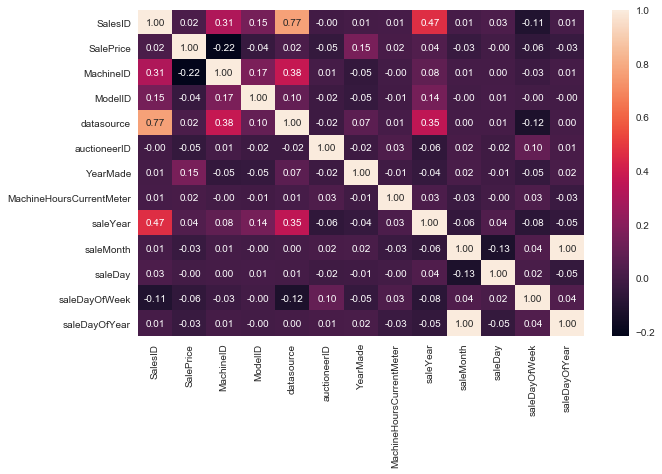

In [22]:
# heat map plot of the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

## 5. Modelling

In [23]:
# Building a model using the RandomForestRegressor estimator
seed = np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1,
                             random_state=seed)
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])


ValueError: could not convert string to float: 'Low'

### Converting strings into categories

In [24]:
# This would change all object data type into category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content): # use the data type API
        df_tmp[label] = content.astype('category').cat.as_ordered()
        

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [27]:
df_tmp.isnull().sum()/ len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving the processed dataset

In [28]:
df_tmp.to_csv('data/train_tmp.csv', index=False)

In [29]:
df_tmp = pd.read_csv('data/train_tmp.csv', low_memory=False)
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

###  Filling missing values

### Fill numerical missing value 

In [30]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [31]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [32]:
# which numerical features have missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label + '_is_missing'] = pd.isnull(content)
            # fill with the median value of the column
            df_tmp[label] = content.fillna(content.median())

In [72]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### Fill the categorical values

In [35]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
# filling in the missing categorical values with it's cat codes + 1
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a new column to indicate if thevalue of missing (boolean value)
        df_tmp[label + '_is_missing'] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1

In [37]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [38]:
df_tmp.tail().T

,412693,412694,412695,412696,412697
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000,6000,16000,55000,34000
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,False


##  Model 2
Building another models after filling missing values in our dataset

In [39]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [40]:
# Split into X & y
# np.random.seed(42)
# X, y = df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice']

# %time
# model = RandomForestRegressor(n_jobs=-1, random_state=seed)
# model.fit(X, y)
# # model.score(X, y)

In [41]:
# %time model.score(X, y)

## Split dataset into Train and Validation sets

The model above was  trained on the whole set without splitting into different sets, therefore the is just a memorization model.Below the a training and validation sets would be created using the time stamp stated in the file descriptions.

In [42]:
df_val = df_tmp[df_tmp['saleYear'] == 2012]
df_train = df_tmp[df_tmp['saleYear'] != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [43]:
X_train, y_train = df_train.drop('SalePrice',axis=1), df_train['SalePrice']
X_train.shape, y_train.shape

((401125, 102), (401125,))

In [44]:
X_valid , y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']
X_valid.shape, y_valid.shape

((11573, 102), (11573,))

# 6 . Evaluation 


Trying another model on the X_train and y_train set, then checking it's R^2 score on the X_valid and y_valid set

`NOTE`
> Running a model on this size of data would require a lot of computational resources, therefore the model would be tested on a subset of data (this would be useful for hyper tuning).

In [45]:
# model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)
# model.score(X_valid, y_valid)

##### Building a evaluation function
The model would be evaluated on it's Root Mean Squared Log Error (RMSLE)

In [46]:
def rmsle(y_test, y_preds):
    '''
    Calculates the root mean squared log error between the true value
    and the predicted values
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    ''' Outputs the score of different metrics'''
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        'Train MAE' : mean_absolute_error(y_train, train_preds),
        'Valid MAE' : mean_absolute_error(y_valid, valid_preds),
        'Train RMSLE' : rmsle(y_train, train_preds),
        'Valid RMSLE' : rmsle(y_valid, valid_preds),
        'Train R^2' : r2_score(y_train, train_preds),
        'Valid R^2' : r2_score(y_valid, valid_preds),
        
    }
    if hasattr(model, 'oob_score'):
        scores['Oob Score'] = model.oob_score_
    return scores


In [47]:
len(X_train)

401125

In [48]:
# change the value of max_samples
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1, random_state=seed,
                             max_samples=10000, 
                             oob_score=True)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Train R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507,
 'Oob Score': 0.8535667924664436}

###  Hyperparameter tuning using RandomizedSearchCV

In [60]:
%time

seed = np.random.seed(42)

rf_grid = {
    'n_estimators' : np.arange(10, 100, 10),
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split' : np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1, 20, 2),
    'max_features' : [0.5, 1, 'sqrt', 'auto'],
    'max_samples' : [100000],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=seed
                                                    , oob_score=True),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
# fit the model
rf_model.fit(X_train, y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.9 µs
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [61]:
rf_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 100000,
 'max_features': 1,
 'max_depth': None}

In [62]:
show_scores(rf_model)

{'Train MAE': 6650.4323783383015,
 'Valid MAE': 9538.114573029048,
 'Train RMSLE': 0.3020351624967112,
 'Valid RMSLE': 0.38793077108173835,
 'Train R^2': 0.8113817404309918,
 'Valid R^2': 0.7313084072528833}

In [67]:
%time 

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5, 
                                   n_jobs=-1, 
                                   max_samples=None,
                                   random_state=42, 
                                   oob_score=True)
ideal_model.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [68]:
show_scores(ideal_model)

{'Train MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Train RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Train R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094,
 'Oob Score': 0.9051427838369298}

###  Making Prediction on the Test set

In [85]:
df_test = pd.read_csv('data/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [75]:
test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

###  Preprocessing the test data set

In [86]:
def preprocess_data(df):
    '''
    Perform transformations on the dataset .
    '''
   # creating more features from the saledate feature
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek' ] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill the numerical rows with there median value
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + '_is_missing'] = pd.isnull(content)
                # fill with the median value of the column
                df[label] = content.fillna(content.median())
    
            # This would change all object data type into category
        if not pd.api.types.is_numeric_dtype(content): # use the data type API
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1 
        
    return df

In [87]:
# processed data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [94]:
# running a model on the test set (preprocessed)
ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [88]:
# checking for the missing column
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [95]:
df_test['auctioneerID_is_missing']= False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [97]:
#Making a prediction on the test set
test_preds = ideal_model.predict(df_test)
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [104]:
data = {
    'SalesID' : df_test['SalesID'],
    'SalePrice' : test_preds,
}
df_test_preds = pd.DataFrame(data)
df_test_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


### Feature Importance

In [118]:
def plot_feature_imp(columns, features_importance, n=20):
    ''' show each features predictive importance 
    n : number of features to plot (default=20)
    columns : dataset columns
    feature_importance :  feature_importance_ attribute
    '''
    df = (pd.DataFrame(data = {
        'column' : columns,
        'importance' : features_importance
        }).sort_values('importance', ascending=False)
          .reset_index(drop=True)
        )
    # plot feature importance
    fig, ax = plt.subplots()
    ax.barh(df['column'][:n], df['importance'][:n])
    plt.xlabel('Importance bar')
    plt.ylabel('Features')
    plt.title('Feature importance')
    ax.invert_yaxis()
    plt.show

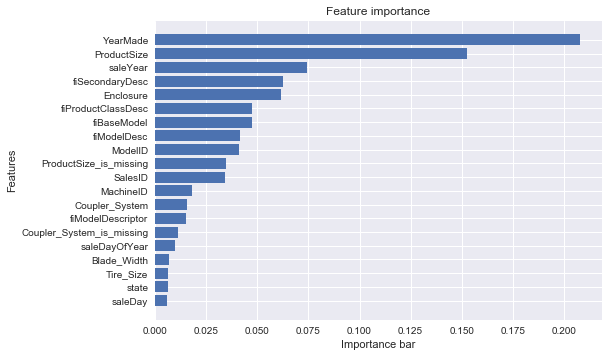

In [120]:
imp = ideal_model.feature_importances_
plot_feature_imp(X_train.columns, imp, n=20)